# Scipy

[Scipy](https://scipy.org/) is the fundamental package for scientific computing with Python.

### Installation:

<div class="alert alert-block alert-warning">
$ pip install scipy
</div>

In [1]:
! pip install scipy

In [19]:
! pip install matplotlib

# Integration

+ `quad`

In [2]:
import numpy as np
from scipy.integrate import quad

In [4]:
quad(lambda x: np.sin(x), 0, np.pi)

(2.0, 2.220446049250313e-14)

In [6]:
np.cos(0) - np.cos(np.pi)

2.0

In [8]:
def f(x):
    return 1/(1+x)

In [9]:
quad(f, a=0, b=np.inf)

/var/folders/n_/r9yj_2js1418_tccsyp_f6s80000gn/T/ipykernel_40357/1909829541.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(f, a=0, b=np.inf)


(40.996012819169536, 8.156214940493658)

In [10]:
def g(x):
    return 1/(1+x)**2

In [11]:
quad(g, a=0, b=np.inf)

(1.0, 1.1102230246251565e-14)

In [12]:
def h(x, c1=1, c2=1):
    return c1 / (c2 + x)**2

In [15]:
quad(h, a=0, b=np.inf, args=(2, 0.1))

(20.0, 2.6394890715405897e-09)

In [16]:
def o(x, alpha, beta):
    return np.sin(alpha*x) + np.cos(beta*x)

In [18]:
quad(o, a=-np.pi, b=np.pi, args=(1, 1))

(3.0018995503231777e-16, 6.304915998800248e-14)

# Interpolation

+ `interp1d`

In [21]:
import matplotlib.pyplot as plt

In [26]:
x = np.linspace(0, 10, 1001)
y = np.sin(np.sqrt(x))

xx = np.linspace(0, 10, 11)
yy = np.sin(np.sqrt(xx))

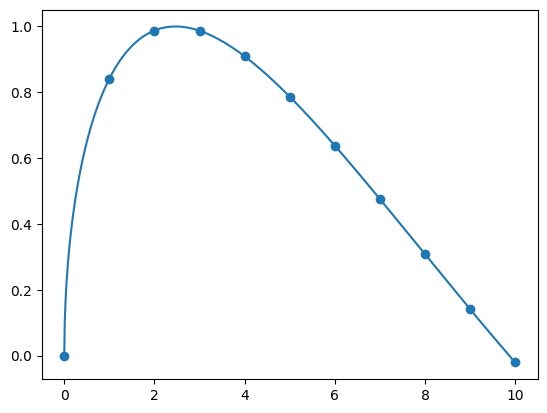

In [27]:
plt.plot(x, y);
plt.scatter(xx, yy)

In [28]:
from scipy.interpolate import interp1d

In [40]:
p_linear = interp1d(x=xx, y=yy, kind='linear')
p_quadratic = interp1d(x=xx, y=yy, kind='quadratic')
p_cubic = interp1d(x=xx, y=yy, kind='cubic')

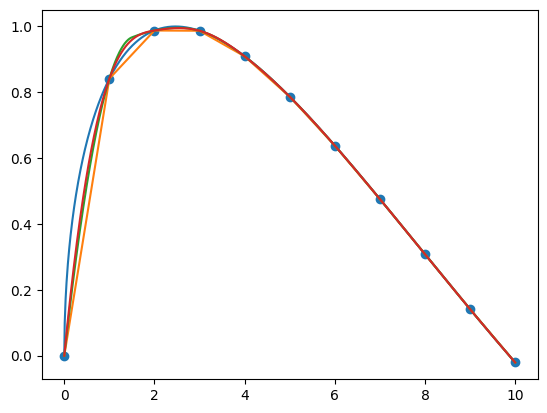

In [42]:
plt.plot(x, y);
plt.scatter(xx, yy)
plt.plot(x, p_linear(x));
plt.plot(x, p_quadratic(x));
plt.plot(x, p_cubic(x));

# Try yourself:

please do an interpolation for the folowing fuction with 21, 31, 41, 51 points:

$$f(x) = \sqrt{\sin(x)^2}, ~~~ x \in [-2\pi, 2\pi]$$



# Optimization

+ `minimize`

In [9]:
from scipy.optimize import minimize
import numpy as np

In [2]:
ans = minimize(lambda x: x**2 + 1, method='nelder-mead', x0=10)

In [5]:
ans

 final_simplex: (array([[ 0.00000000e+00],
       [-6.10351562e-05]]), array([1., 1.]))
           fun: 1.0
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([0.])

In [7]:
ans.x, ans.fun

(array([0.]), 1.0)

In [12]:
# x = (x_1, x_2, x_3, x_4)
# sum(x_i^2) + 1
ans = minimize(lambda x: np.sum(x**2) + 1, method='nelder-mead', x0=np.array([10, 10, 10, 10]))
print(ans.message)

Optimization terminated successfully.


In [13]:
ans

 final_simplex: (array([[-2.65442237e-05,  1.12314782e-05, -1.51653776e-05,
        -3.40479927e-05],
       [-1.26976984e-05, -2.51974068e-05, -3.27384527e-05,
         4.01693955e-05],
       [ 1.85998478e-05,  2.91564123e-05, -3.66112408e-06,
         5.04949456e-05],
       [ 2.78281882e-05,  4.65382391e-05, -5.08230806e-05,
        -1.87915205e-05],
       [ 7.27091825e-05, -3.18847273e-05,  1.01832144e-05,
         3.91206452e-05]]), array([1.        , 1.        , 1.        , 1.00000001, 1.00000001]))
           fun: 1.0000000022199964
       message: 'Optimization terminated successfully.'
          nfev: 261
           nit: 151
        status: 0
       success: True
             x: array([-2.65442237e-05,  1.12314782e-05, -1.51653776e-05, -3.40479927e-05])

In [14]:
# (x + 2y - y)^2 + (2x + y - 5)^2

In [15]:
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [17]:
ans = minimize(f, method='nelder-mead', x0 = np.array([10, 10]))
print(ans.message)
print(ans.x, ans.fun)

Optimization terminated successfully.
[1.00000346 3.00001143] 1.029458242212379e-09


In [18]:
ans = minimize(lambda x: (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2,
               method = 'nelder-mead', 
               x0 = np.array([10, 10]))
print(ans.message)
print(ans.x, ans.fun)

Optimization terminated successfully.
[1.00000346 3.00001143] 1.029458242212379e-09


In [20]:
ans = minimize(lambda x: np.sum(x**2) + 1,
               method='CG',
               x0=np.array([10, 10, 10, 10]),
               jac=lambda x: 2*x)

print(ans.message)
print(ans.x, ans.fun)

Optimization terminated successfully.
[-2.09610107e-13 -2.09610107e-13 -2.09610107e-13 -2.09610107e-13] 1.0


In [21]:
ans

     fun: 1.0
     jac: array([-4.19220214e-13, -4.19220214e-13, -4.19220214e-13, -4.19220214e-13])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 4
  status: 0
 success: True
       x: array([-2.09610107e-13, -2.09610107e-13, -2.09610107e-13, -2.09610107e-13])

In [22]:
def Beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

In [25]:
ans = minimize(Beale,
               method='nelder-mead',
               x0=np.array([-10, 10]))

print(ans.message)
print(ans.x, ans.fun)

Maximum number of function evaluations has been exceeded.
[-294.17999858    1.00335017] 0.4572805266572859


## Try yourself:

https://en.wikipedia.org/wiki/Test_functions_for_optimization